In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
""" Initialize plots properties """
# Set plot style
plt.style.use('default')

# Set plot properties
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelpad'] = 14
plt.rcParams['axes.titlepad'] = 14
plt.rcParams['legend.frameon'] = True

In [7]:
credit = pd.read_csv("credit_risk_dataset.csv") #-- Read dataset for analysis
credit.sample(10) #-- Show 10 random rows in the dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
18015,27,200000,MORTGAGE,7.0,PERSONAL,B,15000,9.88,0,0.07,N,9
16372,24,42000,MORTGAGE,8.0,VENTURE,B,22250,11.11,0,0.53,N,2
20883,27,44000,OWN,4.0,PERSONAL,C,2000,13.35,0,0.05,N,5
6565,22,50000,MORTGAGE,6.0,VENTURE,B,7200,NaN,0,0.14,N,3
31716,42,113000,MORTGAGE,11.0,EDUCATION,D,24000,15.31,1,0.21,Y,15
2926,24,100000,RENT,0.0,HOMEIMPROVEMENT,B,3000,9.76,0,0.03,N,3
25198,30,42000,RENT,1.0,PERSONAL,B,12000,9.88,0,0.29,N,8
16329,22,43600,MORTGAGE,4.0,DEBTCONSOLIDATION,D,10000,14.96,1,0.23,N,2
16166,23,21000,RENT,2.0,VENTURE,C,3000,12.68,0,0.14,N,3
14633,25,110000,MORTGAGE,NaN,VENTURE,B,7000,9.88,0,0.06,N,2


In [55]:
credit['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [59]:
credit['loan_intent'] = credit['loan_intent'].str.replace('DEBTCONSOLIDATION','Debt Consolidation').str.replace('HOMEIMPROVEMENT','Home Improvement')
credit['loan_intent'] = credit['loan_intent'].str.title()
credit['loan_intent'].value_counts()

loan_intent
Education             6453
Medical               6071
Venture               5719
Personal              5521
Debt Consolidation    5212
Home Improvement      3605
Name: count, dtype: int64

In [54]:
# Displays statistical information about the numerical columns
credit.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [5]:
# General overview of the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Checks for null values
credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [52]:
"""Classify person into age groups"""

# Labels for each group
age_label = ['20-30','31-50','51-69','70+'] 

# create group and add to daataset as a new column
credit['age_group'] = pd.cut(credit['person_age'],bins=4, labels=age_label, right=True, include_lowest=True) 

In [4]:
# Get list of data columns
credit_columns = credit.columns

""" Group numerical and categorical data type"""
num_columns = credit.select_dtypes(include=["int","float"]) #For numerical data types
cat_columns = credit.select_dtypes(include="object") #For categorical data types

In [60]:
# Standardized values in the object columns
for column in cat_columns:
    credit[column] = credit[column].str.title()

In [61]:
credit.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
12085,24,79400,Mortgage,8.0,Home Improvement,B,12000,9.88,0,0.15,N,4,20-30
11995,22,78000,Mortgage,3.0,Education,E,16000,16.45,0,0.21,N,3,20-30
8473,22,23400,Rent,NaN,Education,A,7700,5.99,1,0.33,N,2,20-30
22092,29,52000,Own,13.0,Venture,C,1000,13.23,0,0.02,N,8,20-30
31710,40,125000,Mortgage,3.0,Personal,A,10200,7.49,0,0.08,N,13,20-30
28759,27,20000,Rent,0.0,Venture,B,8000,11.89,1,0.40,N,6,20-30
26909,29,118400,Mortgage,11.0,Education,A,35000,7.90,0,0.30,N,8,20-30
3026,22,35000,Mortgage,6.0,Education,B,3500,11.48,0,0.10,N,4,20-30
21638,27,40800,Rent,11.0,Personal,A,6000,7.66,0,0.15,N,7,20-30
12340,25,38340,Rent,9.0,Medical,B,12000,11.71,1,0.31,N,2,20-30


In [24]:
credit['person_age'].max()

144

<Axes: xlabel='person_age', ylabel='Count'>

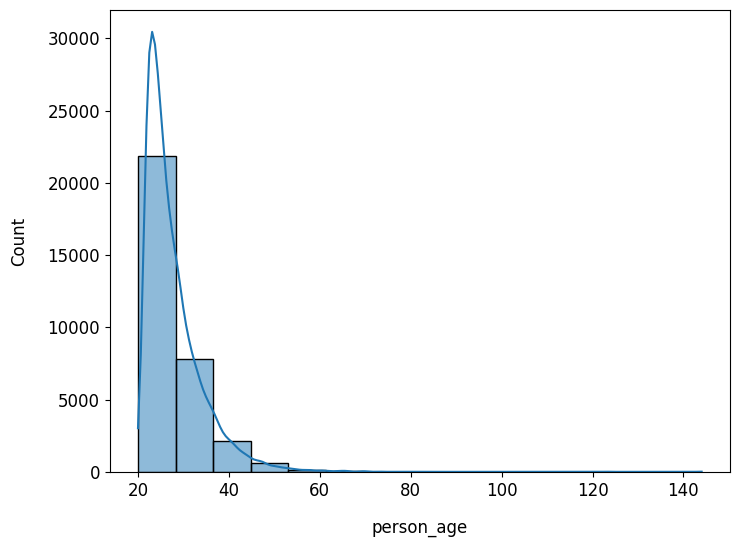

In [34]:
sns.histplot(data=credit,x='person_age', bins= 15 ,kde=True)

In [ ]:
sns.countplot(data=credit,x="loan_status", hue="loan_status",legend=True)
plt.xlabel("Loan Status")
plt.ylabel("jdjf", loc="center")
plt.grid(axis="y", alpha=0.2)